In [2]:
#Import Necessary Package
from sklearn.neural_network import MLPClassifier
from sklearn import datasets
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [11]:
#Read Dataset
df=pd.read_csv("./dataset/iris.csv")
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Create input and target attributes
x=df.drop(["Id","Species"],axis=1)
y=df["Species"]

In [6]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
#scaler=StandardScaler()
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.fit(x_test)

In [12]:
#Create Model
model=MLPClassifier(hidden_layer_sizes=(10,10), solver='lbfgs', max_iter=100,random_state=42,alpha=1e-08)
model.fit(x_train,y_train)

/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/dsenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-08, hidden_layer_sizes=(10, 10), max_iter=100,
              random_state=42, solver='lbfgs')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



<Axes: >

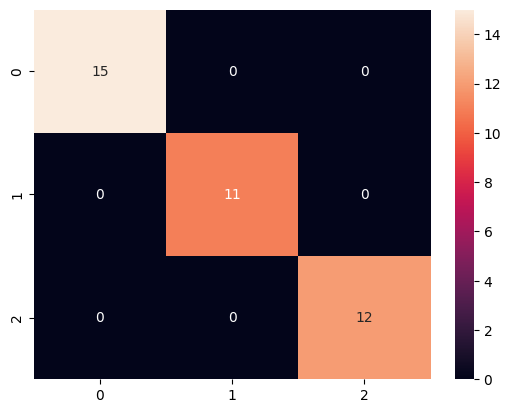

In [13]:
#Predict & evaluate on Test data
y_pred=model.predict(x_test)
confmat=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(confmat,annot=True)

In [14]:
#Predict on custom data
model.predict([[5.1,3.5,1.4,0.2]])

/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/dsenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype='<U15')

In [15]:
#Create a List of Random Inputs
import random
print(df.min())
print(df.max())
cust=[]
for i in range(10):
    cusdata=[]
    attr=random.randint(4,8)
    cusdata.append(attr)
    attr=random.randint(2,5)
    cusdata.append(attr)
    attr=random.randint(1,7)
    cusdata.append(attr)
    attr=random.randint(0,3)
    cusdata.append(attr)
    cust.append(cusdata)

Id                         1
SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object
Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object


In [16]:
#Predict on the above list of Random inouts
model.predict(cust)

/home/ma1581/Downloads/debian/learning/practiceSession/DSLab/dsenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype='<U15')

In [55]:
model=MLPClassifier(hidden_layer_sizes=(5,5), solver='lbfgs', max_iter=50,random_state=42,alpha=1e-08)
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-08, hidden_layer_sizes=(5, 5), max_iter=50,
              random_state=42, solver='lbfgs')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



<Axes: >

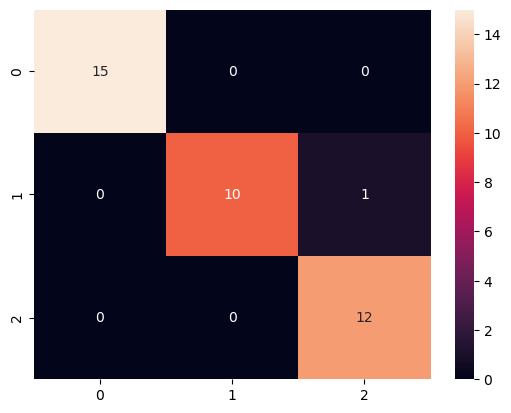

In [56]:
y_pred=model.predict(x_test)
confmat=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
sns.heatmap(confmat,annot=True)

In [58]:
model.predict([[5.1,3.5,1.4,0.2]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype='<U15')